#0 Package installing

In [2]:
"""
그냥 패키지 전에 쓰던거 가지고왔고, 당연히 추가하고 빼도됩니다. 
"""
# loading packages
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt

# PCA packages
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from functools import reduce
from sklearn.model_selection import TimeSeriesSplit

import pandas_datareader.data as web  # module for reading datasets directly from the web
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1 Data preprocessing 

In [4]:
#그 Lu Zhang q code monthly data 예요 수업시간에 과제로 썼던것 - 이거 전체가 x입니다 
#the data that made in class code 2-2
frictions = pd.read_csv('/content/drive/MyDrive/DS4F/DFS_2022/frictions.csv')
intang = pd.read_csv('/content/drive/MyDrive/DS4F/DFS_2022/intangibles.csv')
invest = pd.read_csv('/content/drive/MyDrive/DS4F/DFS_2022/investment.csv')
mom = pd.read_csv('/content/drive/MyDrive/DS4F/DFS_2022/momentum.csv')
profit = pd.read_csv('/content/drive/MyDrive/DS4F/DFS_2022/profitability.csv')
vag = pd.read_csv('/content/drive/MyDrive/DS4F/DFS_2022/value_growth.csv')


In [5]:
#There are unnaed:0 column that is same with index number. Its not necessary so we need to delete it 
frictions = frictions.iloc[:,1:]
intang = intang.iloc[:,1:]
invest = invest.iloc[:,1:]
mom = mom.iloc[:,1:]
profit = profit.iloc[:,1:]
vag = vag.iloc[:,1:]

In [6]:
print(frictions.shape)
print(intang.shape)
print(invest.shape)
print(mom.shape)
print(profit.shape)
print(vag.shape)

(660, 11)
(660, 31)
(660, 30)
(660, 42)
(660, 47)
(660, 33)


In [7]:
#Merge all datasets 
dfs = [frictions,intang,invest,mom,profit,vag]
df_merge = reduce(lambda left,right: pd.merge(left,right,on='date',how='left'), dfs)


In [8]:
#Process the date of the data
total = df_merge
total['date'] =pd.to_datetime(total['date'])
total['date'] =total['date'].dt.strftime('%Y-%m')

In [9]:
#Check the data set
total['date']

0      1967-01
1      1967-02
2      1967-03
3      1967-04
4      1967-05
        ...   
655    2021-08
656    2021-09
657    2021-10
658    2021-11
659    2021-12
Name: date, Length: 660, dtype: object

In [10]:
#total.reset_index(inplace = True)
total.rename(columns={'date':'DATE'}, inplace = True)

In [11]:
#일단 결측치 처리를 0으로 채우긴했는데, 결과 보고 이전값으로 채우거나 하는 방식으로 바꿔볼수 있을것 같아요 
#dataset = total.fillna(0)

dataset = total.dropna(axis=1)

In [12]:
dataset

,DATE,beta_1,dtv_12,isff_1,ivff_1,me,srev,tv_1,eprd,etl,...,epq_12,ir,rev_1,rev_6,rev_12,sp,spq_1,spq_6,spq_12,vhp
0,1967-01,11.8004,-4.4299,3.5865,12.1847,-13.0562,-0.1126,11.4709,8.6986,3.0873,...,9.4271,-10.9358,-3.3122,-3.3122,-3.3122,10.5298,11.8753,11.8753,11.8753,8.9013
1,1967-02,2.1382,-2.7018,-1.2576,4.7215,-5.1638,2.8017,4.7486,-5.0862,-3.8491,...,-3.6533,2.9416,-0.4161,-0.5976,-0.5976,-0.7410,-0.2473,-0.5354,-0.5354,-4.3270
2,1967-03,0.2358,-1.6275,4.8673,0.6764,-3.3238,-1.5156,0.3803,-0.3200,-0.2502,...,1.8400,-2.6113,0.5145,0.8580,0.8580,1.9728,0.3762,0.2091,0.2091,3.6893
3,1967-04,3.0167,0.5737,-3.6645,-3.0035,-0.7099,-1.9171,-0.8516,-2.8200,1.0904,...,-2.6575,1.4119,3.7632,3.6845,3.6845,-1.0793,-3.0121,-1.9934,-1.9934,-1.9834
4,1967-05,1.3046,-6.4407,-1.2705,3.4395,-4.8868,-4.0637,0.6068,1.9194,1.5000,...,3.3314,-2.4843,-2.8353,-2.6136,-2.6136,2.0838,4.9051,4.0210,4.0210,0.7269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,2021-08,0.7348,1.3942,-1.4633,-1.3650,0.6421,2.9832,-0.4001,-1.1960,-0.6989,...,-2.2072,2.4422,1.0257,1.0282,1.2988,-2.4126,-1.2230,-2.0030,-1.6366,-1.6819
656,2021-09,9.5032,-2.3366,1.9337,1.0624,-1.4418,-1.7750,1.1031,2.1055,2.4773,...,0.3463,-5.9879,-7.5190,-7.2946,-5.7782,1.8645,2.4312,2.6438,2.4803,-1.7282
657,2021-10,1.7722,5.5664,0.9665,-2.3577,8.4341,2.6571,0.5204,-2.6409,-0.7454,...,-6.8053,8.6927,5.0123,5.3302,6.1313,-5.0713,-8.6452,-7.8362,-7.1274,-13.1422
658,2021-11,-4.0661,4.6815,5.1696,-5.6675,7.9488,8.6912,-3.1802,-10.0804,-1.2931,...,0.7586,6.6664,10.0202,9.1353,8.7391,1.0565,-1.6667,-0.5971,1.0156,-5.6053


In [13]:
dataset = dataset.set_index(dataset['DATE'], inplace = False)
dataset =  dataset.drop(columns =['DATE'])

In [14]:
# from sklearn.preprocessing import RobustScaler
# robustScaler = RobustScaler()
# dataset_rob = robustScaler.fit_transform(dataset)
# dataset_rob = pd.DataFrame(dataset_rob,columns = dataset.columns )

In [15]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# dataset = scaler.fit_transform(dataset)

In [16]:
logdata = np.log(dataset*0.01+1)

#model


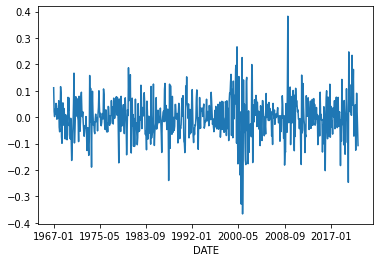

In [ ]:
logdata['beta_1'].plot()

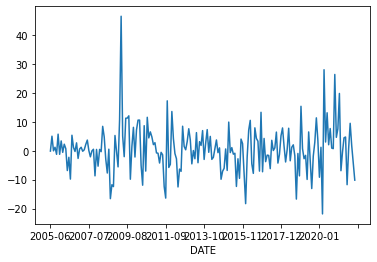

In [ ]:
dataset['beta_1'][-199:].plot()

In [157]:
from sklearn.linear_model import LogisticRegression


In [223]:
seqLength = 12 # window size 
dataDim = 1 
hiddenDim = 6 
outputDim = 1
lr = 0.01
iterations = 500

list_model = []
predict = []
pred_proba=[]
def buildDataSet(timeSeries, seqLength):
    xdata = []
    ydata = [] 
    for i in range(0, len(timeSeries)-seqLength):
        tx = timeSeries[i:i+seqLength]
        ty = timeSeries[i+seqLength]
        variable  = ty > 0
        y1 = variable.astype(int)
        xdata.append(tx)
        ydata.append(y1)
    return np.array(xdata), np.array(ydata)


In [ ]:
list_test_x = []
list_test_y = []

for i in range(118):
    trainSize = int(len(dataset.iloc[:,i])*0.7)
    trainSet = dataset.iloc[:,i][0:trainSize]
    testSet = dataset.iloc[:,i][trainSize-seqLength:]

    trainX, trainY = buildDataSet(trainSet, seqLength)
    testX, testY = buildDataSet(testSet, seqLength)

    model = LogisticRegression()
    model.fit(trainX,trainY)
    trainscore = model.score(trainX,trainY)
    print(trainscore)

    list_test_x.append(testX)
    list_test_y.append(testY)


In [257]:
list_test_y[0]

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0])

In [269]:
from sklearn.metrics import accuracy_score


In [364]:
#7 모델 사용
list_predict = []
list_actual = list_test_y
proba=[]
pred_proba = []
for i in range(118):
    xhat = list_test_x[i]
    yhat = model.predict(xhat)
    list_predict.append(yhat)
    proba = model.predict_proba(xhat) #minus일 확률 
    probability = pd.DataFrame(proba, columns = ['Minus','Plus'])
    pred_proba.append(probability['Plus'])

In [365]:
result = pd.DataFrame(pred_proba)

In [366]:
result.reset_index(drop=True, inplace = True)

In [367]:
result

,0,1,2,3,4,5,6,7,8,9,...,189,190,191,192,193,194,195,196,197,198
0,0.424869,0.441536,0.613294,0.489295,0.705091,0.637950,0.539206,0.572448,0.492708,0.530558,...,0.277316,0.930534,0.797809,0.460439,0.835839,0.558533,0.362751,0.647804,0.847223,0.622391
1,0.573566,0.559121,0.544786,0.527154,0.578896,0.440683,0.456942,0.547696,0.550057,0.521583,...,0.560442,0.437209,0.456152,0.563081,0.536274,0.670138,0.649458,0.596634,0.402635,0.588736
2,0.554380,0.550016,0.512052,0.587129,0.554971,0.558798,0.573696,0.564362,0.556931,0.573729,...,0.384384,0.603273,0.473654,0.612264,0.547110,0.539906,0.561740,0.538376,0.646926,0.619530
3,0.455170,0.455602,0.617593,0.565193,0.668480,0.680903,0.622143,0.525271,0.568661,0.548787,...,0.166928,0.845716,0.303462,0.662376,0.654602,0.399953,0.455458,0.325360,0.880515,0.411626
4,0.606388,0.601512,0.530875,0.560775,0.536744,0.430102,0.432913,0.553071,0.545682,0.549356,...,0.495168,0.332055,0.358914,0.521954,0.316287,0.727046,0.690848,0.707950,0.298654,0.522613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0.488265,0.669619,0.579418,0.551515,0.487787,0.718440,0.560214,0.538623,0.631692,0.559713,...,0.508427,0.741731,0.498862,0.709215,0.619009,0.447439,0.625891,0.401283,0.802683,0.308219
114,0.484215,0.657875,0.612987,0.520791,0.525101,0.722922,0.565902,0.554774,0.584461,0.542550,...,0.535169,0.731861,0.578900,0.562901,0.516364,0.522328,0.574839,0.487523,0.678745,0.242611
115,0.486667,0.663715,0.586321,0.537505,0.496268,0.708698,0.584098,0.530710,0.589688,0.553437,...,0.550032,0.760970,0.520567,0.639500,0.558530,0.475288,0.597517,0.460210,0.716633,0.265273
116,0.484982,0.669330,0.583167,0.547311,0.491973,0.721404,0.570508,0.538350,0.610724,0.555993,...,0.549134,0.770379,0.498844,0.676019,0.585761,0.455478,0.619306,0.431398,0.760038,0.269903


In [368]:
q_high_index=[]
q_low_index=[]

for i in range(199):
    q_high_index.append(result[i].sort_values()[-quantile:].index)
    q_low_index.append(result[i].sort_values()[:quantile].index)
    

In [370]:
#로지스틱결과임
sum_high=0
sum_low=0
for j in range(199):
    high = 0
    low = 0
    for i in range(quantile):
        high += dataset[-199:].values[j][q_high_index[j][i]]
        low += dataset[-199:].values[j][q_low_index[j][i]]
    sum_high += high
    sum_low += low

print(sum_high)
print(sum_low)

-62.06089999999961
692.4852000000006


In [371]:
t_high_index=[]
t_low_index=[]

for i in range(199):
    t_high_index.append(df_predict[i].sort_values()[-tenpercent:].index)
    t_low_index.append(df_predict[i].sort_values()[:tenpercent].index)

In [155]:
sum_high=0
sum_low=0
for j in range(199):
    high = 0
    low = 0
    for i in range(quantile):
        high += dataset[-199:].values[j][q_high_index[j][i]]
        low += dataset[-199:].values[j][q_low_index[j][i]]
    sum_high += high
    sum_low += low

print(sum_high)
print(sum_low)

1229.0697000000011
131.9110999999997


In [156]:
t_sum_high=0
t_sum_low=0
for j in range(199):
    high = 0
    low = 0
    for i in range(tenpercent):
        high += dataset[-199:].values[j][t_high_index[j][i]]
        low += dataset[-199:].values[j][t_low_index[j][i]]
    t_sum_high += high
    t_sum_low += low

print(t_sum_high)
print(t_sum_low)

585.3799999999999
31.06419999999995


In [ ]:
len(dataset)-199

461

In [138]:
real =dataset[-199:]
real.reset_index(drop = True, inplace =True)
real.columns = columns
real

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,117
0,-0.1157,-4.4340,0.0832,5.3574,-5.2650,-0.5794,6.0008,3.7779,-0.8656,-1.8224,...,5.8989,-2.6565,3.9777,3.2235,2.8301,6.7559,6.2270,6.5695,6.5958,6.1743
1,5.0418,-2.4530,0.8182,5.4754,-4.6414,-0.8566,5.9714,2.3493,-0.9912,3.9892,...,0.7696,0.2151,2.7364,0.2588,-0.0386,1.2955,2.1979,1.9821,1.7914,0.3621
2,-0.0265,0.9455,0.8823,1.0002,-0.1636,1.5769,1.0743,0.7489,-0.1586,0.6945,...,1.0665,-3.2487,-1.7863,-1.3827,-1.4560,2.5589,2.0585,0.5394,1.5941,3.1982
3,1.2087,-0.7959,2.4858,1.8622,-1.3180,10.1170,1.6153,1.7983,-1.0137,-1.9109,...,2.9835,-0.7236,-0.3751,0.4276,0.5364,2.7099,0.9573,1.6482,2.4203,3.4731
4,-1.2368,0.4354,1.2613,-2.2703,1.7909,-1.5440,-2.3111,-6.2567,2.1466,4.8505,...,-4.2555,2.8796,1.5396,1.0116,0.4222,-2.7762,-2.0237,-2.5976,-2.9366,-8.1973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.7348,1.3942,-1.4633,-1.3650,0.6421,2.9832,-0.4001,-1.1960,-0.6989,-0.7664,...,-2.2072,2.4422,1.0257,1.0282,1.2988,-2.4126,-1.2230,-2.0030,-1.6366,-1.6819
195,9.5032,-2.3366,1.9337,1.0624,-1.4418,-1.7750,1.1031,2.1055,2.4773,-1.1027,...,0.3463,-5.9879,-7.5190,-7.2946,-5.7782,1.8645,2.4312,2.6438,2.4803,-1.7282
196,1.7722,5.5664,0.9665,-2.3577,8.4341,2.6571,0.5204,-2.6409,-0.7454,-2.7059,...,-6.8053,8.6927,5.0123,5.3302,6.1313,-5.0713,-8.6452,-7.8362,-7.1274,-13.1422
197,-4.0661,4.6815,5.1696,-5.6675,7.9488,8.6912,-3.1802,-10.0804,-1.2931,-5.3710,...,0.7586,6.6664,10.0202,9.1353,8.7391,1.0565,-1.6667,-0.5971,1.0156,-5.6053


In [140]:
real = real.T

In [141]:
real_high_index=[]
real_low_index=[]
for i in range(199):
    real_high_index.append(real[i].sort_values()[-tenpercent:].index)
    real_low_index.append(real[i].sort_values()[:tenpercent].index)

In [148]:
real_sum_high=0
real_sum_low=0
for j in range(199-2):
    high = 0
    low = 0
    for i in range(tenpercent):
        high += dataset[-199:].values[j+2][real_high_index[j][i]]
        low += dataset[-199:].values[j+2][real_low_index[j][i]]
    real_sum_high += high
    real_sum_low += low

print(real_sum_high)
print(real_sum_low)

684.0828
2.836400000000026


In [ ]:
dataset.iloc[461]

beta_1   -0.1157
dtv_12   -4.4340
isff_1    0.0832
ivff_1    5.3574
me       -5.2650
           ...  
sp        6.7559
spq_1     6.2270
spq_6     6.5695
spq_12    6.5958
vhp       6.1743
Name: 2005-06, Length: 118, dtype: float64

In [ ]:
real_high_index[0]

Index(['epq_12', 'tv_1', 'vhp', 'spq_1', 'spq_6', 'spq_12', 'sp', 'ebp', 'cp',
       'ep'],
      dtype='object')

In [ ]:
dataset.to_csv('/content/drive/MyDrive/DS4F/dataset.csv')

In [65]:
high_index[0]

Int64Index([111, 108, 105, 17, 117, 51, 110, 45, 106, 43], dtype='int64')

In [ ]:
low_index

[Int64Index([60, 97, 56, 63, 105, 57, 106, 107, 64, 117], dtype='int64'),
 Int64Index([104, 102, 78, 5, 84, 77, 83, 19, 12, 85], dtype='int64'),
 Int64Index([21, 10, 31, 60, 101, 58, 30, 39, 55, 59], dtype='int64'),
 Int64Index([0, 6, 19, 5, 79, 44, 86, 107, 3, 52], dtype='int64'),
 Int64Index([61, 116, 60, 63, 115, 114, 94, 103, 113, 13], dtype='int64'),
 Int64Index([48, 5, 22, 52, 72, 34, 117, 38, 41, 77], dtype='int64'),
 Int64Index([18, 78, 21, 8, 104, 77, 12, 84, 89, 85], dtype='int64'),
 Int64Index([5, 21, 97, 117, 60, 52, 58, 105, 59, 108], dtype='int64'),
 Int64Index([104, 109, 13, 71, 79, 0, 102, 10, 86, 36], dtype='int64'),
 Int64Index([16, 20, 9, 101, 48, 4, 19, 37, 58, 35], dtype='int64'),
 Int64Index([52, 55, 5, 48, 15, 7, 117, 105, 51, 77], dtype='int64'),
 Int64Index([101, 10, 13, 113, 44, 79, 60, 21, 116, 76], dtype='int64'),
 Int64Index([0, 26, 18, 102, 45, 36, 39, 104, 12, 32], dtype='int64'),
 Int64Index([104, 10, 102, 9, 109, 86, 40, 71, 20, 4], dtype='int64'),
 Int

In [68]:
pd.DataFrame(high_index)

,0,1,2,3,4,5,6,7,8,9
0,111,108,105,17,117,51,110,45,106,43
1,94,68,59,58,97,108,117,107,105,106
2,105,57,69,117,51,72,68,107,106,48
3,1,87,25,85,14,84,83,78,4,77
4,27,11,31,23,33,30,5,52,14,48
...,...,...,...,...,...,...,...,...,...,...
194,99,101,0,37,100,22,38,18,96,21
195,94,113,78,98,77,115,116,87,88,114
196,76,34,27,95,91,6,61,94,4,0
197,43,89,77,87,38,29,94,78,97,95


In [ ]:
dataset[-199:]

,beta_1,dtv_12,isff_1,ivff_1,me,srev,tv_1,eprd,etl,etr,...,epq_12,ir,rev_1,rev_6,rev_12,sp,spq_1,spq_6,spq_12,vhp
DATE,,,,,,,,,,,,,,,,,,,,,
2005-06,-0.1157,-4.4340,0.0832,5.3574,-5.2650,-0.5794,6.0008,3.7779,-0.8656,-1.8224,...,5.8989,-2.6565,3.9777,3.2235,2.8301,6.7559,6.2270,6.5695,6.5958,6.1743
2005-07,5.0418,-2.4530,0.8182,5.4754,-4.6414,-0.8566,5.9714,2.3493,-0.9912,3.9892,...,0.7696,0.2151,2.7364,0.2588,-0.0386,1.2955,2.1979,1.9821,1.7914,0.3621
2005-08,-0.0265,0.9455,0.8823,1.0002,-0.1636,1.5769,1.0743,0.7489,-0.1586,0.6945,...,1.0665,-3.2487,-1.7863,-1.3827,-1.4560,2.5589,2.0585,0.5394,1.5941,3.1982
2005-09,1.2087,-0.7959,2.4858,1.8622,-1.3180,10.1170,1.6153,1.7983,-1.0137,-1.9109,...,2.9835,-0.7236,-0.3751,0.4276,0.5364,2.7099,0.9573,1.6482,2.4203,3.4731
2005-10,-1.2368,0.4354,1.2613,-2.2703,1.7909,-1.5440,-2.3111,-6.2567,2.1466,4.8505,...,-4.2555,2.8796,1.5396,1.0116,0.4222,-2.7762,-2.0237,-2.5976,-2.9366,-8.1973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08,0.7348,1.3942,-1.4633,-1.3650,0.6421,2.9832,-0.4001,-1.1960,-0.6989,-0.7664,...,-2.2072,2.4422,1.0257,1.0282,1.2988,-2.4126,-1.2230,-2.0030,-1.6366,-1.6819
2021-09,9.5032,-2.3366,1.9337,1.0624,-1.4418,-1.7750,1.1031,2.1055,2.4773,-1.1027,...,0.3463,-5.9879,-7.5190,-7.2946,-5.7782,1.8645,2.4312,2.6438,2.4803,-1.7282
2021-10,1.7722,5.5664,0.9665,-2.3577,8.4341,2.6571,0.5204,-2.6409,-0.7454,-2.7059,...,-6.8053,8.6927,5.0123,5.3302,6.1313,-5.0713,-8.6452,-7.8362,-7.1274,-13.1422


In [66]:
sum_high=0
sum_low=0
for j in range(199):
    high = 0
    low = 0
    for i in range(10):
        high += dataset[-199:].values[j][high_index[j][i]]
        low += dataset[-199:].values[j][low_index[j][i]]
    sum_high += high
    sum_low += low

print(sum_high)
print(sum_low)

34.254099999999845
603.0734000000001
